# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Three Observable Trends in the Data

# 1. Based on our data, we can see a relationship between temperature and latitude. As one travels farther away from
# the equator, temperature decreases while temperature increases as one gets closer to the equator. While, some places
# of higher latitudes can have warmer temperatures and places at lower latitudes may have cooler temperatures, usually,
# the closer a place is to the equator, the warmer it is.

# 2. There appears to be little/ no correlation between humidity and latitude. Where a city is located in relation to 
# the equator does not affect how humid that place is.

# 3. There appears to be little/ no correlation between cloudiness and latitude. The location of a place in relation
# to the equator does not affect how cloudy that place is.

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units=Imperial&q="

# Set empty lists for each response
City_Data = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudines = []
Wind_Speed = []
Country = []
Date = []

print('Beginning Data Retrieval')
print('----------------------------')

# find the information for each city
for index, city in enumerate(cities):

    city_url = query_url + city
    
    
    try:
        # assemble url and make API request
        print(f"Processing Record {index} {city}")
        response = requests.get(city_url).json()
        lat = response['coord']['lat']
        max_temp = response['main']['temp_max']
        humidity = response['main']['humidity']
        date = response['dt']
        lng = response['coord']['lon']
        wind_speed = response['wind']['speed']
        country = response['sys']['country']
        cloudiness = response['clouds']['all']
        
        City_Data.append({"City": city,
                         "Lat": lat,
                         "Lng": lng,
                         "Cloudiness": cloudiness,
                         "Date": date,
                         "Humidity": humidity,
                         "Max Temp": max_temp,
                         "Wind Speed": wind_speed,
                         "Country": country})
        
       
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
        
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 0 alice springs
Processing Record 1 castro
Processing Record 2 diffa
Processing Record 3 butajira
Processing Record 4 shu
Processing Record 5 tongliao
Processing Record 6 bredasdorp
Processing Record 7 cabo san lucas
Processing Record 8 mackay
Processing Record 9 katsuura
Processing Record 10 barentsburg
City not found. Skipping...
Processing Record 11 ushuaia
Processing Record 12 cape town
Processing Record 13 leticia
Processing Record 14 kapaa
Processing Record 15 hilo
Processing Record 16 avarua
Processing Record 17 new norfolk
Processing Record 18 bluff
Processing Record 19 illoqqortoormiut
City not found. Skipping...
Processing Record 20 atuona
Processing Record 21 richards bay
Processing Record 22 amahai
Processing Record 23 airai
Processing Record 24 muisne
Processing Record 25 mataura
Processing Record 26 arraial do cabo
Processing Record 27 longyearbyen
Processing Record 28 umzimvubu
City not found. Skippi

Processing Record 239 tello
Processing Record 240 kyabram
Processing Record 241 saint george
Processing Record 242 tasiilaq
Processing Record 243 fukue
Processing Record 244 morehead
Processing Record 245 taoudenni
Processing Record 246 shangzhi
Processing Record 247 tarsus
Processing Record 248 dumka
Processing Record 249 oranjestad
Processing Record 250 talnakh
Processing Record 251 cheyur
City not found. Skipping...
Processing Record 252 panaba
Processing Record 253 pringsewu
Processing Record 254 puerto ayora
Processing Record 255 kavieng
Processing Record 256 esperance
Processing Record 257 marcona
City not found. Skipping...
Processing Record 258 broken hill
Processing Record 259 aykhal
Processing Record 260 cedar rapids
Processing Record 261 lososina
Processing Record 262 bedum
Processing Record 263 yulara
Processing Record 264 fallon
Processing Record 265 ust-karsk
Processing Record 266 banda aceh
Processing Record 267 la orilla
Processing Record 268 anadyr
Processing Record 26

Processing Record 487 kushiro
Processing Record 488 svetlogorsk
Processing Record 489 cherdyn
Processing Record 490 kautokeino
Processing Record 491 melfi
Processing Record 492 rive-de-gier
Processing Record 493 kango
Processing Record 494 porto belo
Processing Record 495 katobu
Processing Record 496 ewa beach
Processing Record 497 yarmouth
Processing Record 498 tromso
Processing Record 499 half moon bay
Processing Record 500 dabakala
Processing Record 501 tsihombe
City not found. Skipping...
Processing Record 502 iqaluit
Processing Record 503 hervey bay
Processing Record 504 hami
Processing Record 505 burica
City not found. Skipping...
Processing Record 506 mrirt
City not found. Skipping...
Processing Record 507 faya
Processing Record 508 shimoda
Processing Record 509 grojec
Processing Record 510 santa isabel do rio negro
Processing Record 511 oxford
Processing Record 512 chapais
Processing Record 513 manzhouli
Processing Record 514 pisco
Processing Record 515 coos bay
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
City_Data_df = pd.DataFrame(City_Data)
City_Data_df.count()

City          550
Lat           550
Lng           550
Cloudiness    550
Date          550
Humidity      550
Max Temp      550
Wind Speed    550
Country       550
dtype: int64

In [10]:
City_Data_df.head()

,City,Lat,Lng,Cloudiness,Date,Humidity,Max Temp,Wind Speed,Country
0,alice springs,-23.70,133.88,0,1592435696,51,37.40,4.70,AU
1,castro,-24.79,-50.01,0,1592435696,93,56.70,4.43,BR
2,diffa,13.32,12.61,98,1592435696,52,83.84,14.58,NE
3,butajira,8.12,38.37,77,1592435697,78,60.60,1.90,ET
4,shu,43.60,73.76,1,1592435697,68,54.59,4.45,KZ


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# Calculate if humidity > 100%
City_Data_df.describe()

,Lat,Lng,Cloudiness,Date,Humidity,Max Temp,Wind Speed
count,550.000000,550.000000,550.000000,5.500000e+02,550.000000,550.000000,550.000000
mean,21.239218,18.319291,47.160000,1.592436e+09,70.436364,67.565836,8.000055
std,32.783764,91.048314,37.854624,6.791071e+01,21.264886,14.665312,5.280303
min,-54.800000,-175.200000,0.000000,1.592435e+09,8.000000,28.400000,0.540000
25%,-4.557500,-64.432500,6.250000,1.592436e+09,58.000000,56.450000,4.035000
50%,26.005000,23.555000,40.000000,1.592436e+09,76.000000,69.135000,6.930000
75%,48.527500,100.212500,85.750000,1.592436e+09,86.750000,78.800000,10.775000
max,78.220000,179.320000,100.000000,1.592436e+09,100.000000,102.200000,32.350000


In [13]:
# Get the indices of cities that have humidity over 100%.
index_data = City_Data_df[(City_Data_df["Humidity"] > 100)].index
index_data

Int64Index([], dtype='int64')

In [134]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = City_Data_df.drop(index_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Cloudiness,Date,Humidity,Max Temp,Wind Speed,Country
0,alice springs,-23.70,133.88,0,1592435696,51,37.40,4.70,AU
1,castro,-24.79,-50.01,0,1592435696,93,56.70,4.43,BR
2,diffa,13.32,12.61,98,1592435696,52,83.84,14.58,NE
3,butajira,8.12,38.37,77,1592435697,78,60.60,1.90,ET
4,shu,43.60,73.76,1,1592435697,68,54.59,4.45,KZ


In [139]:
# Extract relevant fields from the data frame
lat_data = clean_city_data["Lat"]
max_temp_data = clean_city_data["Max Temp"]
cloudiness_data = clean_city_data["Cloudiness"]
humidity_data = clean_city_data["Humidity"]
wind_speed_data = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
new_city_data.to_csv("../output_data/weather_data.csv", index_label="city_id", encoding="utf-8", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

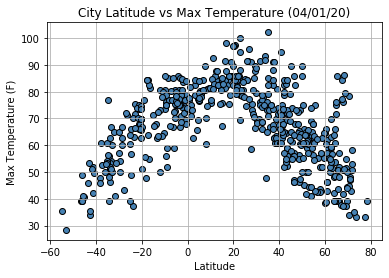

In [122]:
# Create a scatter plot crossing Lat vs Temp
plt.scatter(lat_data, max_temp_data, marker="o", facecolors="steelblue", edgecolors="black")
plt.title(f"City Latitude vs Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid(True)
plt.savefig("../output_data/City Latitude vs Max Temperature.png")
# plt.savefig("output_data/fig1.png")

plt.show()

# This code is looking at the relationship between max temperature and latitude. We are graphing a scatter plot
# comparing these two variables. As one would expect, the max temperature is higher, the closer a person is to the
# equator. As a person moves farther away from the equator, the max temperature decreases. This is not always the case
# but usually, a higher max temperature is equated to closeness to the equator.

## Latitude vs. Humidity Plot

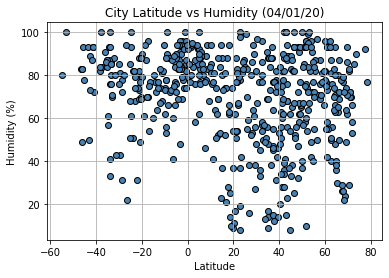

In [123]:
plt.scatter(lat_data, humidity_data, marker="o", facecolors="steelblue", edgecolors="black")
plt.title(f"City Latitude vs Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(True)
plt.savefig("../output_data/City Latitude vs Humidity.png")
# plt.savefig("output_data/fig2.png")

plt.show()

# The code is measuring the relationship between latitude and humidity and we are graphing a scatter plot to look at
# the relationship between the variables. Based on this graph, there is no clear relationship between latitude and 
# humidity like we saw in the previous graph. We cannot determine humidity based on a location's latitude.

## Latitude vs. Cloudiness Plot

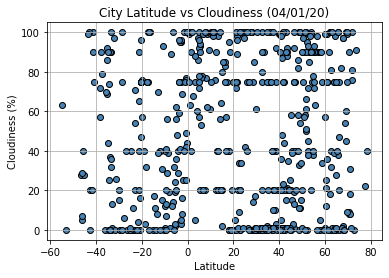

In [124]:
plt.scatter(lat_data, cloudiness_data, marker="o", facecolors="steelblue", edgecolors="black")
plt.title(f"City Latitude vs Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid(True)
plt.savefig("../output_data/City Latitude vs Cloudiness.png")
# plt.savefig("output_data/fig3.png")

plt.show()

# The code is measuring the relationship between latitude and cloudiness and we are graphing a scatter plot to look at
# the relationship between the variables. Based on this graph, there is no clear relationship between latitude and 
# cloudiness. We cannot determine cloudiness based on a location's latitude.

## Latitude vs. Wind Speed Plot

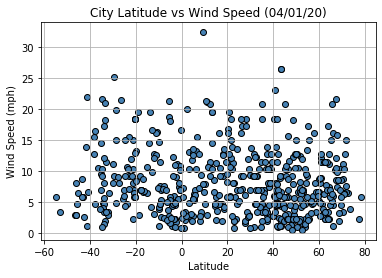

In [125]:
plt.scatter(lat_data, wind_speed_data, marker="o", facecolors="steelblue", edgecolors="black")
plt.title(f"City Latitude vs Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid(True)
plt.savefig("../output_data/City Latitude vs Wind Speed.png")
# plt.savefig("output_data/fig4.png")

plt.show()

# The code is measuring the relationship between latitude and wind speed and we are graphing a scatter plot to look at
# the relationship between the variables. Based on this graph, there is no clear relationship between latitude and 
# wind speed. We cannot determine wind speed based on a location's latitude.

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

In [173]:
# Create Northern and Southern Hemisphere DataFrames
# northern_hemisphere_df = pd.DataFrame(clean_city_data)
# northern_latitude = clean_city_data.loc[clean_city_data["Lat"] >= 0]
northern_hemisphere = new_city_data.loc[new_city_data["Lat"] >= 0]
northern_hemisphere

,City,Lat,Lng,Cloudiness,Date,Humidity,Max Temp,Wind Speed,Country
2,diffa,13.32,12.61,98,1592435696,52,83.84,14.58,NE
3,butajira,8.12,38.37,77,1592435697,78,60.60,1.90,ET
4,shu,43.60,73.76,1,1592435697,68,54.59,4.45,KZ
5,tongliao,43.61,122.27,88,1592435697,56,69.51,9.17,CN
7,cabo san lucas,22.89,-109.91,20,1592435540,19,95.00,8.05,MX
...,...,...,...,...,...,...,...,...,...
545,sovetskaya,44.78,41.17,0,1592435810,8,62.01,4.00,RU
546,frontera,26.93,-101.45,75,1592435811,38,96.01,9.17,MX
547,orocue,4.79,-71.34,75,1592435811,90,77.49,5.57,CO
548,aksay,47.26,39.87,20,1592435811,56,73.00,4.47,RU


In [174]:
# southern_hemisphere_df = pd.DataFrame(new_city_data)
# southern_hemisphere_df = southern_hemisphere_df.loc[southern_hemisphere_df["Lat"] < 0]
southern_hemisphere = new_city_data.loc[new_city_data["Lat"] < 0]
southern_hemisphere

,City,Lat,Lng,Cloudiness,Date,Humidity,Max Temp,Wind Speed,Country
0,alice springs,-23.70,133.88,0,1592435696,51,37.40,4.70,AU
1,castro,-24.79,-50.01,0,1592435696,93,56.70,4.43,BR
6,bredasdorp,-34.53,20.04,0,1592435697,93,39.20,4.94,ZA
8,mackay,-21.15,149.20,90,1592435697,82,68.00,14.99,AU
10,ushuaia,-54.80,-68.30,63,1592435698,80,35.60,5.82,AR
...,...,...,...,...,...,...,...,...,...
529,knysna,-34.04,23.05,0,1592435807,33,62.60,8.05,ZA
532,port lincoln,-34.73,135.87,44,1592435808,61,56.48,21.63,AU
533,dodoma,-6.17,35.74,0,1592435808,75,58.82,5.10,TZ
536,teahupoo,-17.83,-149.27,75,1592435808,70,84.20,6.93,PF


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.52x + 89.17
The r-squared is: 0.4804785617730929


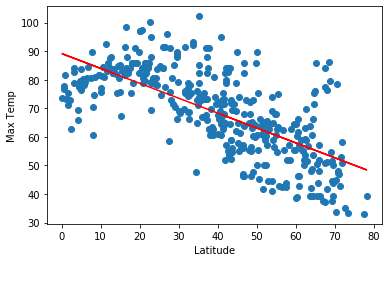

In [184]:
# Perform a linear regression on temperature vs. latitude
# equation = linregress(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(5, 10),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude.png")


# Show plot
plt.show()

# This linear regression plot is looking at latitude vs. max temperature in the Northern Hemisphere. Based on the 
# graph, we can see that overall, as one gets farther away from the equator, the max temperature decreases but it is 
# not always the case as there are some places on our graph that are warmer than places at the equator or those of a 
# lower latitude. Based on our r-squared value of .48, the proportion of the variance in our dependent variable can 
# somewhat be predicted from our independent variable. Our graph would show some/ pretty strong correlation with an 
# r-value of around -.69.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.77x +80.16
The r-squared is: 0.6209434043212654


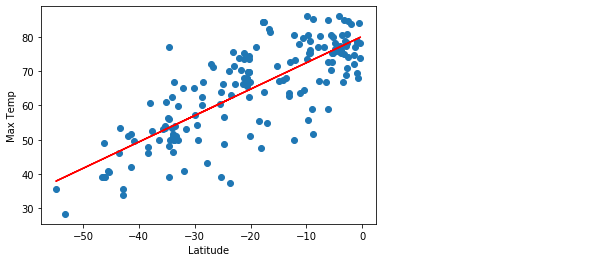

In [190]:
# Perform a linear regression on temperature vs. latitude
# equation = linregress(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude.png")


# Show plot
plt.show()

# This linear regression plot is looking at latitude vs. max temperature in the Southern Hemisphere. Based on the 
# graph, we can see that overall, as one gets farther away from the equator, the max temperature increases but it is 
# not always the case as there are some places on our graph that are warmer than places at the equator or those of a 
# lower latitude. Based on our r-squared value of .62, the proportion of the variance in our dependent variable can 
# better be predicted from our independent variable compared to the previous graph. Our graph would show strong 
# correlation with an r-value of around .79.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.06x +69.48
The r-squared is: 0.00235894792242597


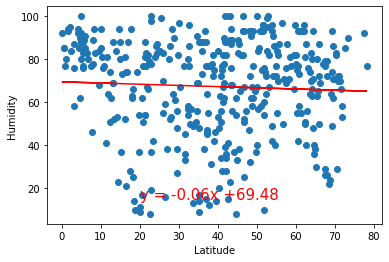

In [191]:
# Perform a linear regression on temperature vs. latitude
# equation = linregress(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Northern Hemisphere - Humidity vs. Latitude.png")


# Show plot
plt.show()

# This linear regression plot is looking at latitude vs. humidity in the Northern Hemisphere. Based on the 
# graph, we can see that there is no clear relationship between humidity and latitude. Humidity does not seem to be 
# determined by the latitude of a place. Based on our r-squared value of .0024, the proportion of the variance 
# in our dependent variable cannot be predicted from our independent variable. 
# Our graph would show no correlation with an r-value of -.0480.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.06x +78.82
The r-squared is: 0.002776368735489851


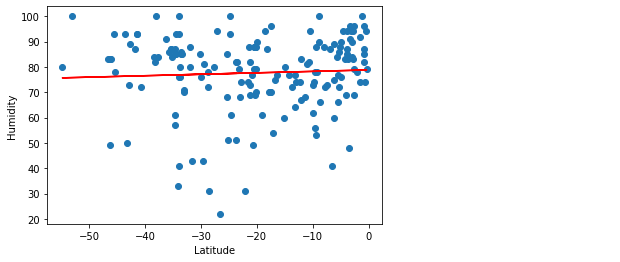

In [192]:
# Perform a linear regression on temperature vs. latitude
# equation = linregress(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Southern Hemisphere - Humidity vs. Latitude.png")


# Show plot
plt.show()

# This linear regression plot is looking at latitude vs. humidity in the Southern Hemisphere. Based on the 
# graph, we can see that there is no clear relationship between humidity and latitude. Humidity does not seem to be 
# determined by the latitude of a place. Based on our r-squared value of .0028, the proportion of the variance 
# in our dependent variable cannot be predicted from our independent variable. 
# Our graph would show no correlation with an r-value of .0520.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.25x +59.64
The r-squared is: 0.016320324746926823


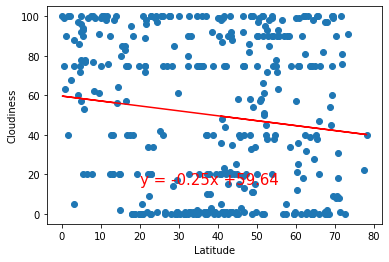

In [193]:
# Perform a linear regression on temperature vs. latitude
# equation = linregress(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Northern Hemisphere - Cloudiness vs. Latitude.png")


# Show plot
plt.show()

# This linear regression plot is looking at latitude vs. cloudiness in the Northern Hemisphere. Based on the 
# graph, we can see that there is no clear relationship between cloudiness and latitude. Cloudiness does not seem to be 
# determined by the latitude of a place. Based on our r-squared value of .016, the proportion of the variance 
# in our dependent variable cannot be predicted from our independent variable. 
# Our graph would show no correlation with an r-value of -.04.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.05x +41.84
The r-squared is: 0.0003903872622718402


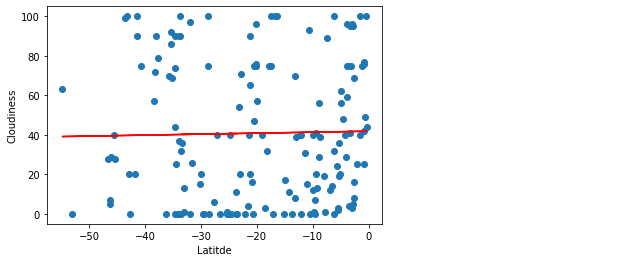

In [194]:
# Perform a linear regression on temperature vs. latitude
# equation = linregress(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitde')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Southern Hemisphere - Cloudiness vs. Latitude.png")


# Show plot
plt.show()

# This linear regression plot is looking at latitude vs. cloudiness in the Southern Hemisphere. Based on the 
# graph, we can see that there is no clear relationship between cloudiness and latitude. Cloudiness does not seem to be 
# determined by the latitude of a place. Based on our r-squared value of .0004, the proportion of the variance 
# in our dependent variable cannot be predicted from our independent variable. 
# Our graph would show no correlation with an r-value of .02.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.02x +8.7
The r-squared is: 0.007731978077836364


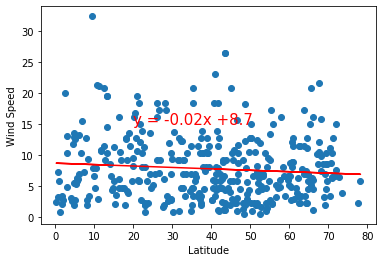

In [195]:
# Perform a linear regression on temperature vs. latitude
# equation = linregress(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Northern Hemisphere - Wind Speed vs. Latitude.png")


# Show plot
plt.show()

# This linear regression plot is looking at latitude vs. wind speed in the Northern Hemisphere. Based on the 
# graph, we can see that there is no clear relationship between wind speed and latitude. Wind speed does not seem to be 
# determined by the latitude of a place. Based on our r-squared value of .008, the proportion of the variance 
# in our dependent variable cannot be predicted from our independent variable. 
# Our graph would show no correlation with an r-value of -.09.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.04x +7.69
The r-squared is: 0.009436227050865224


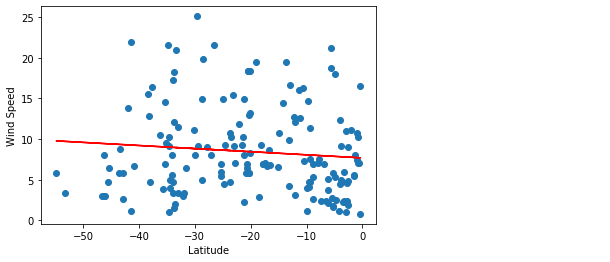

In [196]:
# Perform a linear regression on temperature vs. latitude
equation = linregress(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Southern Hemisphere - Wind Speed vs. Latitude.png")


# Show plot
plt.show()

# This linear regression plot is looking at latitude vs. wind speed in the Southern Hemisphere. Based on the 
# graph, we can see that there is no clear relationship between wind speed and latitude. Wind speed does not seem to be 
# determined by the latitude of a place. Based on our r-squared value of .009, the proportion of the variance 
# in our dependent variable cannot be predicted from our independent variable. 
# Our graph would show no correlation with an r-value of -.095.